Mean Absolute Error: 0.026812638887675433
Mean Squared Error: 0.0009843031242912242
Root Mean Squared Error: 0.03137360553540546
r2_score 0.5298710669857682


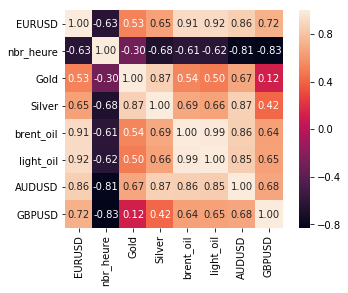

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.metrics import r2_score
import math


#EUR_USD DATASET
df=pd.read_csv('EURUSD_H.csv')
df.columns = ['date','open','high','low','close','volume']
df.date = pd.to_datetime(df.date,format='%d.%m.%Y %H:%M:%S.%f')

#Gold_Price DATASET
df1=pd.read_csv('gold_H.csv')
df1.columns = ['date','open','high','low','close','volume']
df1.date = pd.to_datetime(df1.date,format='%d.%m.%Y %H:%M:%S.%f')


#Silver_Price DATASET
df2=pd.read_csv('silver_H.csv')
df2.columns = ['date','open','high','low','close','volume']
df2.date = pd.to_datetime(df2.date,format='%d.%m.%Y %H:%M:%S.%f')

#Brent_Oil_Price DATASET
df3=pd.read_csv('brent_oil.csv')
df3.columns = ['date','open','high','low','close','volume']
df3.date = pd.to_datetime(df3.date,format='%d.%m.%Y %H:%M:%S.%f')

#Light_Oil_Price DATASET
df4=pd.read_csv('light_oil.csv')
df4.columns = ['date','open','high','low','close','volume']
df4.date = pd.to_datetime(df4.date,format='%d.%m.%Y %H:%M:%S.%f')

#AUD_USD DATASET
df5=pd.read_csv('AUDUSD.csv')
df5.columns = ['date','open','high','low','close','volume']
df5.date = pd.to_datetime(df5.date,format='%d.%m.%Y %H:%M:%S.%f')

#GBP_USD DATASET
df6=pd.read_csv('GBPUSD.csv')
df6.columns = ['date','open','high','low','close','volume']
df6.date = pd.to_datetime(df6.date,format='%d.%m.%Y %H:%M:%S.%f')





#DataFrame

Forex_Market={'date': df['date'],
              'nbr_heure': df.index,
              'EURUSD': df['close'],
              'Gold'  :df1['close'],
              'Silver':df2['close'],
              'brent_oil':df3['close'],
              'light_oil':df4['close'],
              'AUDUSD':df5['close'],
              'GBPUSD':df6['close']
              }

df7=pd.DataFrame(Forex_Market,columns=['date','nbr_heure','EURUSD','Gold','Silver','brent_oil','light_oil','AUDUSD','GBPUSD'])

cols1=['EURUSD','nbr_heure','Gold','Silver','brent_oil','light_oil','AUDUSD','GBPUSD']

#Heatmap

cm=np.corrcoef(df7[cols1].values.T)
hm=sns.heatmap(cm,
              cbar=True,
              annot=True,
              square=True,
              fmt='.2f',
              yticklabels=cols1,
              xticklabels=cols1
              )

#The input

X=df7[['nbr_heure','Gold','Silver','brent_oil','light_oil','AUDUSD','GBPUSD']]

y=df7['EURUSD'].values

#preprocessing

X=np.reshape(X, (len(y), 7))
y=np.reshape(y, (len(y), 1))
minmax_scale = MinMaxScaler().fit(X)
df_minmax = minmax_scale.transform(X) 
minmax_scale = MinMaxScaler().fit(y)
df_minmax = minmax_scale.transform(y)  

#Spliting Data

xtrain=X[:36000]
xtest=X[36000:]
ytrain=y[:36000]
ytest=y[36000:]

#Training Data

regr = linear_model.LinearRegression()
regr.fit(xtrain,ytrain)
ypred = regr.predict(xtest)

#Model Evaluation
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ypred))  
print('Mean Squared Error:', metrics.mean_squared_error(ytest, ypred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ypred)))
print('r2_score',r2_score(ytest,ypred) )



